# 1.1. Data Preprocessing

### A. Scaling

**Why Scaling of features is important?**

Our dataset can contain features that vary highly in magnitude and since ML and DL algorithms use Eucledian distance between two data points in their computations, this is a problem. Input variables may have different units (e.g. feet, kilometers, and hours) that, in turn, may mean the variables have different scales. The results would vary greatly between different units, 5kg and 5000gms.

The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. To supress this effect, we need to bring all features to the same level of magnitudes and this is where scaling comes into the picture.

**How to Scale Features?**

There are two most common methods to perform Feature Scaling.

#### 1. Standardisation

Standardization typically means rescaling data to have a mean of 0 and a standard deviation of 1 (unit variance).

Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.

Mathematically it can be expressed as:

$$
Z = \frac{X-\bar{X}}{\sigma}
$$

where $\bar{X}$ and $\sigma$ are the mean and standard deviation of $X$ and $Z$ is the standardized data.

The *standardize(X)* function below implements the standardization of $X$. 

> **Note:** If $X$ has many dimensions (or features) and we want to standardize each column individually, then we specify the axis:

In [ ]:
def standardize(X):
    Z = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return Z

Generate a random normal distribution (dataset $X$) having 10000 samples with mean ($\bar{X}$) at 1 and standard deviation $(\sigma)$ of 2 and visualize the same

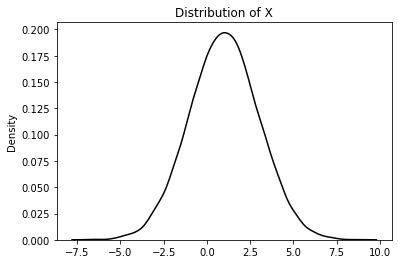

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
X = np.random.normal(size=(10000,1), loc=1, scale=2)

# plot
sns.kdeplot(X[:,0], color='k')
plt.title("Distribution of X")
plt.show()

Now, let us standardize $X$ and visualize it (to demonstrate our function). The complete example is listed below.

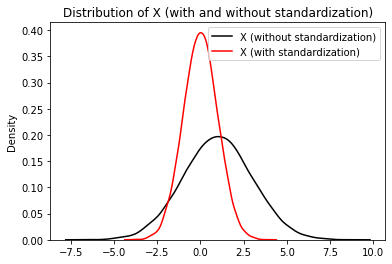

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def standardize(X):
    Z = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return Z

np.random.seed(42)
X = np.random.normal(size=(10000,1), loc=1, scale=2)

Z = standardize(X)

# plot
sns.kdeplot(X[:,0], label="X (without standardization)", color='k')
sns.kdeplot(Z[:,0], label="X (with standardization)", color='r')
plt.title("Distribution of X (with and without standardization)")
plt.legend()
plt.show()

#### Validate using Sklearn

Let us validate our function using sklearn's (which is most useful and robust library for machine learning in Python) StandardScaler module. Complete example is listed below

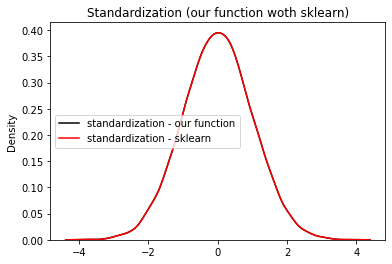

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def standardize(X):
    Z = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return Z

np.random.seed(42)
X = np.random.normal(size=(10000,1), loc=1, scale=2)
Z = standardize(X)

# using sklearn
scaler = StandardScaler()
scaler.fit(X)
Zs = scaler.transform(X)

# plot
sns.kdeplot(Z[:,0], label="standardization - our function", color='k')
sns.kdeplot(Zs[:,0], label="standardization - sklearn", color='r')
plt.title("Standardization (our function woth sklearn)")
plt.legend()
plt.show()

We have successfully validated our function!

#### 2. Min-Max Scaling

In min-max normalization, for every feature (column), its minimum value gets transformed into 0 and its maximum value gets transformed into 1. All values in-between get scaled to be within 0-1 range based on the original value relative to minimum and maximum values of the feature.

Mathematically,

$$
Z = \frac{X-X_{min}}{X_{max}-X_{min}}
$$

Note: If $X$ has many dimensions (or features or columns) and we want to min-max normalize each column individually, then we specify the axis.

The *minmax(X)* function below implements the min-max normalization of $X$.


In [ ]:
def minmax(X):
    Z = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
    return Z

For the given 1D dataset $X$:

```
X = [1, 2, 3, 4, 5]
```

let us normalize (min-max) $X$ (to demonstrate our function). The complete example is listed below.

In [ ]:
import numpy as np

def minmax(X):
    Z = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
    return Z

X = np.array([1, 2, 3, 4, 5])
Z = minmax(X)

print("Original dataset (X) =", X)
print("\nX (after min-max normalization) =", Z)

Original dataset (X) = [1 2 3 4 5]

X (after min-max normalization) = [0.   0.25 0.5  0.75 1.  ]


Now consider a 2D dataset $X$ (having 4 samples):

```
X = [[1, 7],
     [4, 3],
     [5, 2],
     [3, 6]]
```

let us min-max normalize $X$. The complete example is listed below.

In [ ]:
import numpy as np

def minmax(X):
    Z = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
    return Z

X = np.array([[1, 7],
              [4, 3],
              [5, 2],
              [3, 6]])
Z = minmax(X)

print("Original dataset (X) =\n\n", X)
print("\nX (after min-max normalization) =\n\n", Z)

Original dataset (X) =

 [[1 7]
 [4 3]
 [5 2]
 [3 6]]

X (after min-max normalization) =

 [[0.   1.  ]
 [0.75 0.2 ]
 [1.   0.  ]
 [0.5  0.8 ]]


#### Validate using Sklearn

Let us validate our function using sklearn's MinMaxScaler module. Complete example is listed below

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def minmax(X):
    Z = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
    return Z

X = np.array([[1, 7],
              [4, 3],
              [5, 2],
              [3, 6]])
Z = minmax(X)

scaler = MinMaxScaler()
scaler.fit(X)
Zs = scaler.transform(X)

print("Original dataset (X) =\n\n", X)
print("\nMin-Max normalization - our function =\n\n", Z)
print("\nMin-Max normalization - sklearn =\n\n", Zs)

Original dataset (X) =

 [[1 7]
 [4 3]
 [5 2]
 [3 6]]

Min-Max normalization - our function =

 [[0.   1.  ]
 [0.75 0.2 ]
 [1.   0.  ]
 [0.5  0.8 ]]

Min-Max normalization - sklearn =

 [[0.   1.  ]
 [0.75 0.2 ]
 [1.   0.  ]
 [0.5  0.8 ]]


We have successfully validated our function!

### B. Encoding

Most algorithms cannot work with categorical data and needs to be converted into numerical data. Sometimes in datasets, we encounter columns that contain categorical features (string values) for example parameter **Gender** will have categorical parameters like *Male*, *Female*.

Suppose we have the following fictional dataset $X$ with 7 samples (rows) and 3 features (or dimensions or columns; 2 categorical columns *Fruits* and *Vegetables* and 1 numerical column *Value*)

| Fruits | Vegetables | Value |
| --- | --- | --- |
| Apple | Tomato | 8 |
| Mango | Tomato | 3 |
| Apple | Carrot | 7 |
| Orange | Potato | 4 |
| Papaya | Carrot | 6 |
| Banana | Tomato | 7 |
| Orange | Potato | 7 |

#### 1. Label Encoding

One approach to solve this problem can be label encoding where we will assign a numerical value to these labels for example Male and Female mapped to 0 and 1. 

The *label_encoding(Y)* function implemented below performs label encoding of the categorical data $Y$ and returns the label encoded data of $Y$ along with a list of the dictionaries containing the unique values of the columns and their mapping to the integer.

> **Note:** $Y$ must have only categorical columns (like *Fruits* and *Vegetables* only and **NOT** the *Value* column from the above dataset $X$)

In [ ]:
def label_encoding(Y):
    '''
    Parameters:
    Y: (m,d) shape matrix with categorical data
    Return
    result: label encoded data of 𝑌
    idx_list: list of the dictionaries containing the unique values 
              of the columns and their mapping to the integer.
    '''
    idx_list = []
    result = []
    for col in range(Y.shape[1]):
        indexes = {val: idx for idx, val in enumerate(np.unique(Y[:, col]))}
        result.append([indexes[s] for s in Y[:, col]])
        idx_list.append(indexes)
    return np.array(result).T, idx_list

Consider the given dataset $X$ and we want to perform label encoding of $X$ using the function developed above. Complete example is listed below.

In [ ]:
import numpy as np

def label_encoding(Y):
    '''
    Parameters:
    Y: (m,d) shape matrix with categorical data
    Return
    result: label encoded data of 𝑌
    idx_list: list of the dictionaries containing the unique values 
              of the columns and their mapping to the integer.
    '''
    idx_list = []
    result = []
    for col in range(Y.shape[1]):
        indexes = {val: idx for idx, val in enumerate(np.unique(Y[:, col]))}
        result.append([indexes[s] for s in Y[:, col]])
        idx_list.append(indexes)
    return np.array(result).T, idx_list

X = np.array([['Apple', 'Tomato', 8],
              ['Mango', 'Tomato', 3],
              ['Apple', 'Carrot', 7],
              ['Orange', 'Potato', 4],
              ['Papaya', 'Carrot', 6],
              ['Banana', 'Tomato', 7],
              ['Orange', 'Potato', 7]])

Y = X[:, :-1]
Y_label_enc, idx_list = label_encoding(Y)

print("Categorical dataset (Y) =\n\n", Y)
print("\nMapping List of Dictionaries =\n\n", idx_list)
print("\nLabel Encoding of Y =\n\n", Y_label_enc)

Categorical dataset (Y) =

 [['Apple' 'Tomato']
 ['Mango' 'Tomato']
 ['Apple' 'Carrot']
 ['Orange' 'Potato']
 ['Papaya' 'Carrot']
 ['Banana' 'Tomato']
 ['Orange' 'Potato']]

Mapping List of Dictionaries =

 [{'Apple': 0, 'Banana': 1, 'Mango': 2, 'Orange': 3, 'Papaya': 4}, {'Carrot': 0, 'Potato': 1, 'Tomato': 2}]

Label Encoding of Y =

 [[0 2]
 [2 2]
 [0 0]
 [3 1]
 [4 0]
 [1 2]
 [3 1]]


We see here that in the Fruits column, "Apple" is mapped to 0, Banana to 1 and so on. Similarly, in the Vegetables column, "Carrot" is mapped to 0, Potato to 1 and Tomato to 2.

After getting this mapping list, we have our final label encoded matrix

#### 2. One-Hot encoding

In this technique, the categorical parameters will prepare separate columns for all the labels. So, wherever there is Male, the value will be 1 in Male column and 0 in Female column, and vice-versa.

Let us understand this with a simple example where data $X$ is:

| Fruits |
| --- | 
| Apple | 
| Mango | 
| Apple | 
| Apple | 
| Orange |
| Mango |

Notice that $X$ has only 3 unique values "Apple", "Mango" and "Orange". So, the One-Hot encoded matrix of $X$ will look like:

| Fruit | Apple | Mango | Orange |
| --- | --- | --- | --- |
| Apple | 1 | 0 | 0 |
| Mango | 0 | 1 | 0 |
| Apple | 1 | 0 | 0 |
| Apple | 1 | 0 | 0 |
| Orange | 0 | 0 | 1|
| Mango | 0 | 1 | 0|

Just observe that wherever we have "Apple" in the *Fruits* column, the column *Apple* contains value 1 and 0 otherwise. Similarly, wherever we have "Mango" or "Orange" in the *Fruits* column, the columns *Mango* and *Orange* contains value 1 and 0 otherwise respectively.

> **Note:** The order of the columns *Apple*, *Mango* or *Orange* can change

The *onehot(X)* function implemented below performs one hot encoding of the categorical data $X$ and returns the one hot encoded data of $X$ along with a dictionary containing the unique values of $X$ and their mapping to the integer column (as orders can change).


In [ ]:
def onehot(X):
    '''
    Parameters:
    X: 1D array of labels of length "m"
    Return
    X_onehot: (m,d) one hot encoded matrix (one-hot of X) 
              (where d is the number of unique values in X)
    indexes: dictionary containing the unique values of X and their mapping to the integer column
    '''
    indexes = {val: idx for idx, val in enumerate(np.unique(X))}
    y = np.array([indexes[s] for s in X])
    X_onehot = np.zeros((y.size, len(indexes)))
    X_onehot[np.arange(y.size), y] = 1
    return X_onehot, indexes

Consider the dataset from above example $X$ and we want to perform one hot encoding of $X$ using the function developed above. Complete example is listed below.

In [ ]:
import numpy as np

def onehot(X):
    '''
    Parameters:
    X: 1D array of labels of length "m"
    Return
    X_onehot: (m,d) one hot encoded matrix (one-hot of X) 
              (where d is the number of unique values in X)
    indexes: dictionary containing the unique values of X and their mapping to the integer column
    '''
    indexes = {val: idx for idx, val in enumerate(np.unique(X))}
    y = np.array([indexes[s] for s in X])
    X_onehot = np.zeros((y.size, len(indexes)))
    X_onehot[np.arange(y.size), y] = 1
    return X_onehot, indexes

X = np.array(['Apple', 'Mango', 'Apple', 'Apple', 'Orange', 'Mango'])

X_onehot, indexes = onehot(X)

print("Given dataset (X) =\n\n", X.reshape(-1,1))
print("\nMapping Dictionary =", indexes)
print("\nOne Hot Encoding of X =\n\n", X_onehot)

Given dataset (X) =

 [['Apple']
 ['Mango']
 ['Apple']
 ['Apple']
 ['Orange']
 ['Mango']]

Mapping Dictionary = {'Apple': 0, 'Mango': 1, 'Orange': 2}

One Hot Encoding of X =

 [[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
